# Fitting ensemble models with drfsc

## Load, fit, predict, and score using drfsc and WDBC example dataset
In this notebook we continue using the Breast Cancer Wisconsin (Diagnostic) Data Set (WDBC) dataset (available from the [UCI database](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)) to demonstrate how to use the `drfsc` package and some of its functionality.

This example dataset is quite small, so only a small number of partitions will be used. This can be expanded arbitrarily, based on the dataset.

Note: some packages used in this notebook are not part of the drfsc package, and must be installed separately.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from drfsc import drfsc, utils
from sklearn.model_selection import train_test_split

# Loading data
We start by first loading the dataset.

In [2]:
data = utils.load_wdbc("wdbc.data")
print(f"Shape: {data.shape}, Dimensions: {data.ndim}")

Shape: (569, 32), Dimensions: 2


As can be seen from the code below, the first column is an ID column (not used), the second column is the label, and the remaining columns are the features. We split the data accordingly.

In [3]:
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302.0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = data.loc[:, 2:]
X.columns = [f"x_{i}" for i in range(1, X.shape[1] + 1)] # renaming columns
X.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We can also visualise the correlation between the features, and remove highly correlated features as a preprocessing step. See [here](https://markcc309.github.io/drfsc/removing_correlated_features/) for a comment regarding removing correlated features.

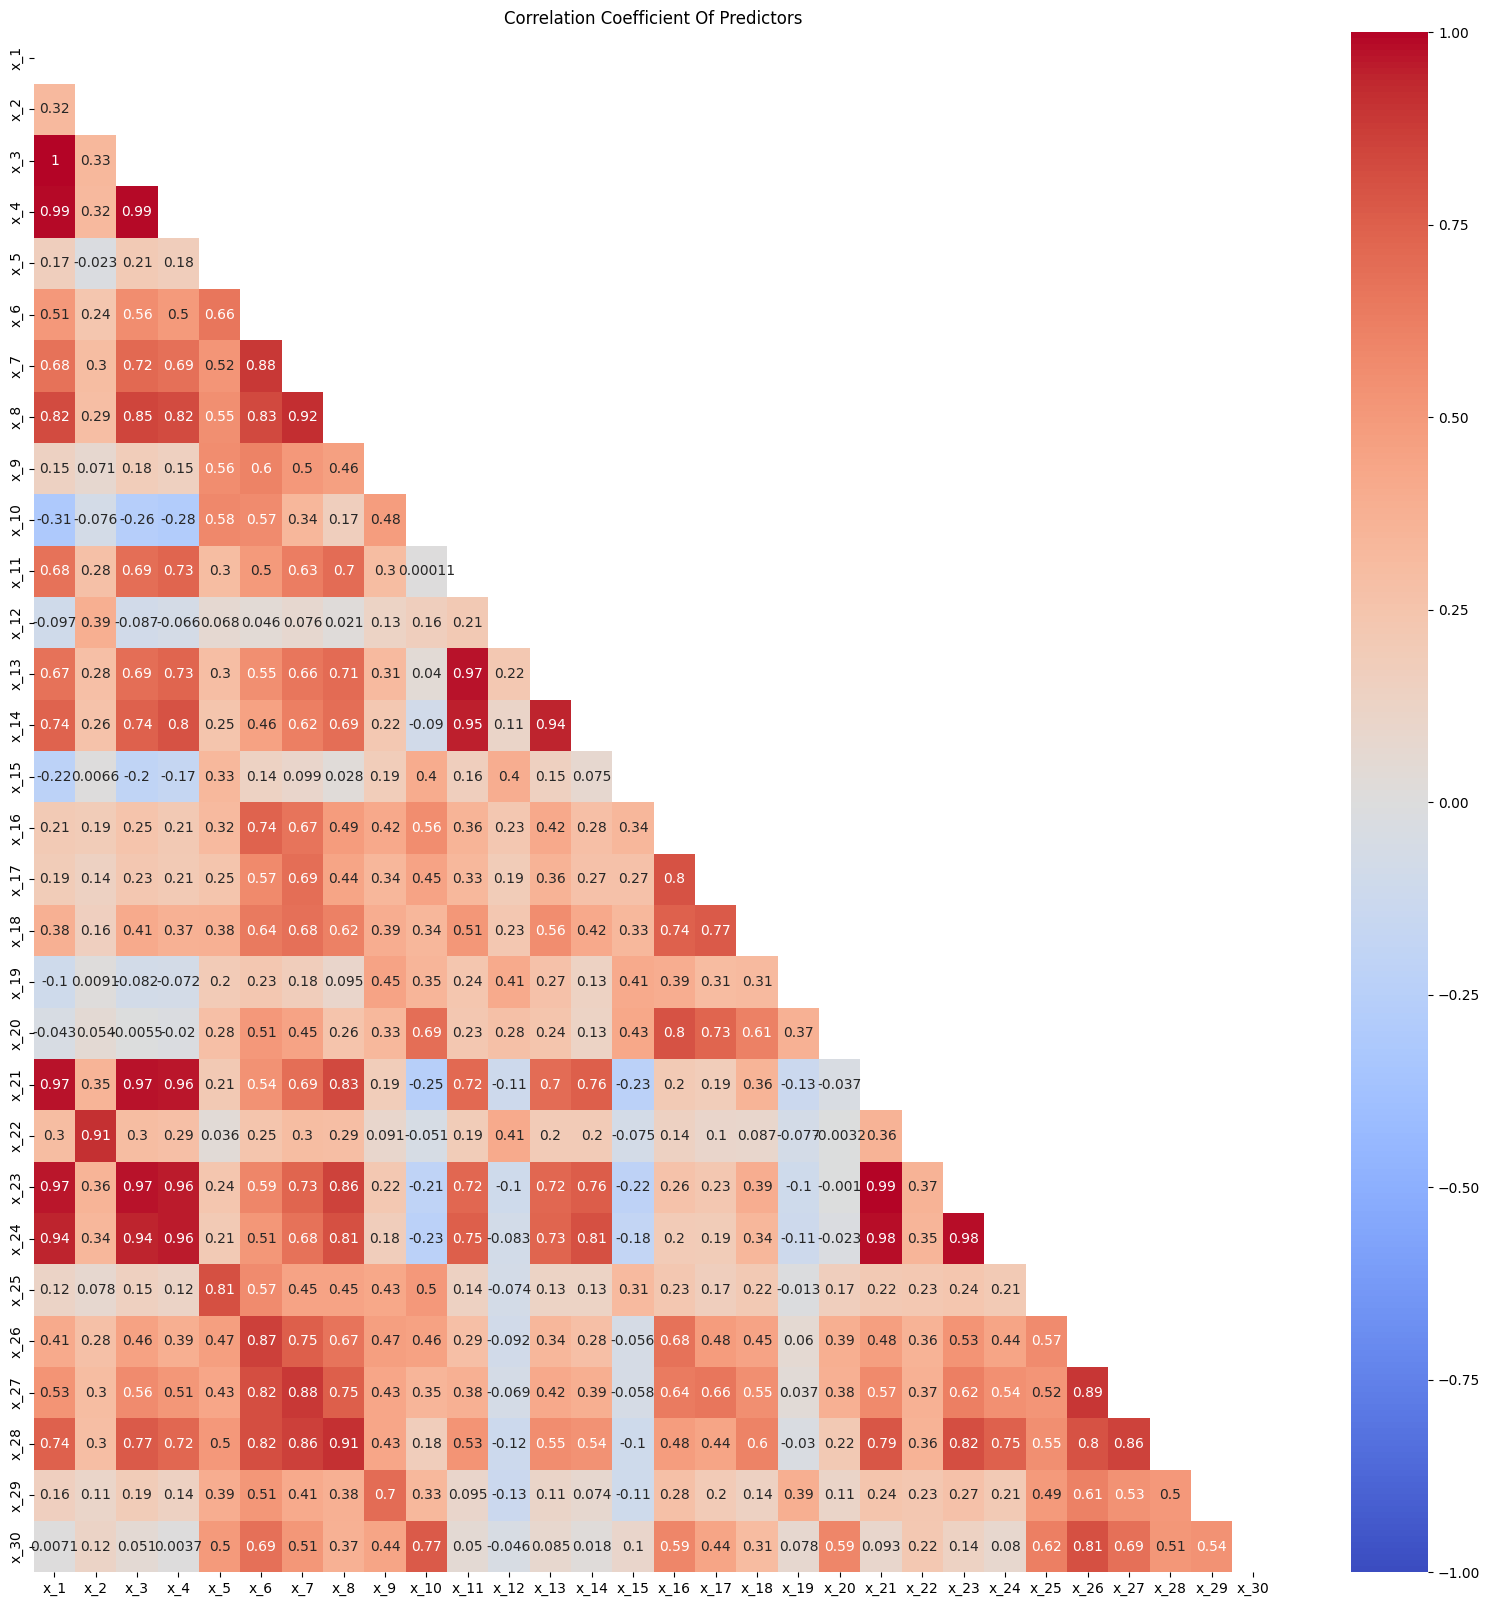

In [5]:
import seaborn as sns # seaborn not included as drfsc dependency

plt.figure(figsize=(20,20))
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
# generate heatmap
sns.heatmap(X.corr(), annot=True, mask=mask, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [6]:
'''
Calculation of how many times a feature was an in high correlation.
Count = 1 denotes only autocorrelation.
'''
df_CorrCount = utils.get_corr_df(X, level=0.8)
display(df_CorrCount)

,Count
x_1,7.0
x_2,2.0
x_3,7.0
x_4,8.0
x_5,2.0
x_6,6.0
x_7,5.0
x_8,10.0
x_9,1.0
x_10,1.0


From this information, we can (optionally) drop the highly correlated features (see below cell).

In [7]:
# col2drop = ['x_1','x_8','x_23','x_24','x_28']
# X = X.drop(columns=col2drop)

In [8]:
Y = data.loc[:, 1]
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 1, dtype: float64

The data then needs to be split into training/validation/testing partitions for use by DRFSC. This is done in the standard way using scikit-learn's `train_test_split` function.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train)

To initialize our model, we call the `DRFSC` class from the `drfsc` module. For this tutorial, we will use 1 iteration (n_runs), and 2 vertical and 2 horizontal partitions (n_vbins and n_hbins respectively).

In this notebook we show the results for when `output = 'ensemble'`. This means that we return an ensemble based on the number of horizontal partitions (here n_hbins=2). The other option is `output='single'`, which returns a single model based on information from all partitions.

In [10]:
model = drfsc.DRFSC(n_vbins=2, n_hbins=2, n_runs=1, output='ensemble', verbose=True)

RFSC_base Initialised with with parameters: 
             n_models = 300, 
             n_iters = 150, 
             tuning = 50, 
             metric = roc_auc, 
             alpha = 0.99 
 ------------
DRFSC Initialised with parameters: 
             n_vbins = 2, 
             n_hbins = 2, 
             n_runs = 1, 
             redistribute = False, 
             sharing = all, 
             k = 0, 
             output = ensemble, 
             metric = roc_auc, 
             max_processes is 8 
 ------------


To load the data into the DRFSC model, we call the `load_data` method from the `DRFSC` class. This function preprocesses the data. Here, we can specify the degree of polynomial expansion desired (here we use degree=2). Note: In the reminder of this tutorial in the explanations we will use notation that clearly references the class and the corresponding method e.g. `DRFSC.load_data`, while in coding example created object of the class i.e.  `model.load_data`.

In [11]:
X_train, X_val, Y_train, Y_val, X_test, Y_test = model.load_data(X_train, X_val, Y_train, Y_val, X_test, Y_test, polynomial=2)

Information for Loaded Data: 
 -------------
'X_train' SHAPE: (364, 496), TYPE: ndarray
'X_val'   SHAPE: (91, 496), TYPE: ndarray
'Y_train' SHAPE: (364,), TYPE: ndarray
'Y_val'   SHAPE: (91,), TYPE: ndarray
-------------


## Initial feature probabilities

RFSC optimization works by first assigning a probability to all features in each partition. We denote by $\mu_i$ the regressor inclusion probability (RIP) of feature $i$. This is the probability that a feature will be included in the randomly generated model. By default, a uniform probability distribution is used, i.e. the initial mu values will be set to 1/n_features for all features by default.

If we want to specify some initial $\mathbf{\mu}$ vector for the RFSC optimization, this can be done via the `DRFSC.set_initial_mu()` method. Below, we set the initial probabilities to be 0.1 for all features. If the `DRFSC.set_initial_probabilities()` is not called, the default initialization will be used.

In [12]:
model.set_initial_mu(0.1)

If instead we only want to change the RIP of specific features, we can pass to `DRFSC.set_initial_mu()` a dictionary where key are feature names (as strings) and the values are the specified RIP, as shown below.

In [13]:
model.set_initial_mu({'x_2': 0.1, 'x_3': 0.1, 'x_9': 0.1})

We can also specify a `_type` parameter in `DRFSC.set_initial_mu`. If we pass `_type='index'`, we can specify the initial RIPs by passing a dictionary with column indicies as keys and RIPs as values. E.g.,

In [14]:
model.set_initial_mu({3: 0.1, 4: 0.1, 10: 0.1}, _type= 'index')

## Updating the parameters for the RFSC optimisation sub-routine

Our DRFSC model solve several RFSC sub-problems in parallel. The parameters of the RFSC optimization process can be updated by calling the `DRFSC.set_rfsc_params()` method. Information for the parameters which can be updated are found in the [API documentation] for RFSC(https://markcc309.github.io/drfsc/rfsc_base_api/). The parameters are updated by passing a dictionary containing the parameters to be updated, and their new values. 

An example is shown below, where we decrease `'n_models'` to $150$ (default $300$), and increase the significance threshold for feature inclusion `'alpha'` to $0.995$ (default $0.99$).

In [ ]:
model.set_rfsc_params({'n_models': 150, 'alpha': 0.995})

Note: By default, the `'metric'` parameter will be inherited from the DRFSC model. It is not recommended to change this behaviour, though it can be done with the `DRFSC.set_rfsc_params()` method.

## Model fitting

To fit our DRFSC model, we simply call the `DRFSC.fit()` method and pass our training and validation data and labels. This will fit the model to the data and return the best model found.

In [15]:
model.fit(X_train, X_val, Y_train, Y_val)

Number of Samples: 364. Horizontal Disitribution SHAPE: (182, 2)
Number of Features: 496. Vertical Distribution SHAPE: (249, 2)
New best model for hbin 1. roc_auc=0.95201 -- Model features [0, 189, 73, 135, 472, 210, 350]
New best model for hbin 0. roc_auc=0.984 -- Model features [0, 4, 114, 101, 36, 289, 47]
M: {0: {0, 289, 353, 193, 4, 101, 36, 455, 383, 268, 109, 47, 464, 303, 114, 82, 470, 223}, 1: {0, 32, 135, 7, 73, 458, 296, 299, 487, 210, 472, 154, 60, 189, 350}}


DRFSC(n_vbins=2, n_hbins=2, n_runs=1, redistribute_features=False, feature_sharing=all, k=0, output=ensemble, metric=roc_auc, verbose=True, polynomial=1, preprocess=True, max_processes=8)

Once a single model has been fit, we can view the features and coefficients of the final model by calling the `features_` and `coef_` attributes. if the input data is a numpy array and has no feature names, we can instead use the `feature_num` attribute to access the indicies of the model features.

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1], dtype=int64)

In [17]:
y_prob = model.predict_proba(X_test)
y_prob

array([0.04647566, 1.        , 0.228666  , 0.99661568, 0.67646301,
       0.05233323, 0.99961736, 0.3011025 , 0.05162502, 0.05207475,
       0.99990131, 0.04789464, 1.        , 0.11713923, 0.35619942,
       0.00207708, 0.85412862, 0.05898274, 0.30588653, 0.04105097,
       0.00396515, 0.21173035, 1.        , 0.99999988, 0.99983561,
       0.00363809, 0.00937737, 0.99995432, 0.99940768, 1.        ,
       1.        , 0.4443542 , 1.        , 1.        , 0.27504675,
       0.24921423, 0.17270788, 0.0039291 , 0.9999971 , 0.98922526,
       0.00434747, 0.02535891, 0.99957054, 0.00914861, 0.16239712,
       0.99991848, 0.47032915, 0.99999834, 0.01855005, 0.04227609,
       1.        , 1.        , 0.61317501, 0.0115908 , 0.01276833,
       1.        , 0.06993183, 0.0038258 , 0.22134159, 1.        ,
       0.37057129, 0.66302046, 0.9935983 , 0.00263898, 0.62746423,
       0.05471465, 1.        , 1.        , 0.43451302, 0.98192262,
       0.00486757, 1.        , 1.        , 0.00310566, 0.04756

Since n_hbins = 2, the number of models in our ensemble will be 2. To view the ensemble, we can call the `DRFSC.ensemble` attribute of our model. This returns dictionary that contains: the list of feature indices for the final model, the feature names (if they exist), and the resulting model object.

In [18]:
model.ensemble

{'model_h0': [[0, 4, 114, 101, 36, 289, 47],
  ['1', 'x_4', 'x_3 x_27', 'x_3 x_14', 'x_1 x_6', 'x_11 x_14', 'x_1 x_17'],
 'model_h1': [[0, 189, 73, 135, 472, 210, 350],
  ['1',
   'x_6 x_24',
   'x_2 x_14',
   'x_4 x_21',
   'x_24 x_28',
   'x_7 x_21',
   'x_14 x_21'],
  <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x2232045d880>]}

If we call the `.features_` and `.coef_` attributes of the ensemble, we can see the features and coefficients of the final model in the ensemble. The features are taken as the union of the features in the individual models, and the coefficients are the average of the coefficients of the individual models.

In [25]:
model.features_

['1',
 'x_4',
 'x_3 x_27',
 'x_3 x_14',
 'x_1 x_6',
 'x_11 x_14',
 'x_1 x_17',
 'x_6 x_24',
 'x_2 x_14',
 'x_4 x_21',
 'x_24 x_28',
 'x_7 x_21',
 'x_14 x_21']

In [26]:
model.coef_

array([  -6.00260593,  -46.9876993 ,   25.37512898,  -18.55185003,
        -82.06156964,   -0.25954326, -106.71151671,    4.01433372,
        243.15851228,   74.91062502,  121.4782516 ,  144.97516502,
        -22.79989108])

# Model Evaluation

To find out how well our model performed, we can use the `DRFSC.score()` method. This method takes our test set data (X_test) and labels (Y_test) as arguments, and a metric as an optional argument (here we use the default metric, `roc-auc` -- see [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for info on roc-auc. It then calculates the metric on the test set, and returns the performance.

The `DRFSC.score()` method combines the predictions from all models in the ensemble. However, if we wish to view the prediction probabilities of each of the model, we can access this by calling the `ensemble_pred` attribute

In [19]:
model.score(X_test, Y_test)

{'metric': 'roc_auc', 'score': 0.9986772486772487}

In [20]:
model.ensemble_pred

,model_h0,model_h1,mean_prob,majority
0,0.079316,0.013636,0.046476,0
1,1.000000,1.000000,1.000000,1
2,0.433356,0.023976,0.228666,0
3,0.993690,0.999541,0.996616,1
4,0.353392,0.999534,0.676463,1
...,...,...,...,...
109,0.020353,0.003296,0.011824,0
110,0.011528,0.003408,0.007468,0
111,0.999483,0.950209,0.974846,1
112,0.999745,0.995777,0.997761,1


# Model Visualization

To visualize the results, we can use the `DRFSC.feature_importance()`, `DRFSC.pos_neg_prediction()`, and `DRFSC.single_prediction()` methods. 

The `DRFSC.feature_importance()` method takes no arguments and displays the a histogram of the final model features and their coefficeints (in __absolute__ value). This plot gives an indication of the features which are most important to the model.

The `DRFSC.pos_neg_prediction()` method takes as an argument the index of the sample we want to visualize. If we want to visualise a prediction on the test set, the test set should also be passed as an argument. This method displays the positive and negative predictions for the sample, computed by multiplying the data by the model coefficients and separating the positive and negative contributions.
- E.g. usage: `DRFSC.pos_neg_prediction(0, X_test)` for visualising the prediction on the first sample in the test set.

The `DRFSC.single_prediction()` method takes the same arguments as `DRFSC.pos_neg_prediction()`, and diplays the model coefficients weighted by the data for the sample. This is useful for visualising the model's prediction on a single sample.
- E.g. usage: `DRFSC.single_prediction(0, X_test)` for visualising the prediction on the first sample in the test set.

<BarContainer object of 2 artists>

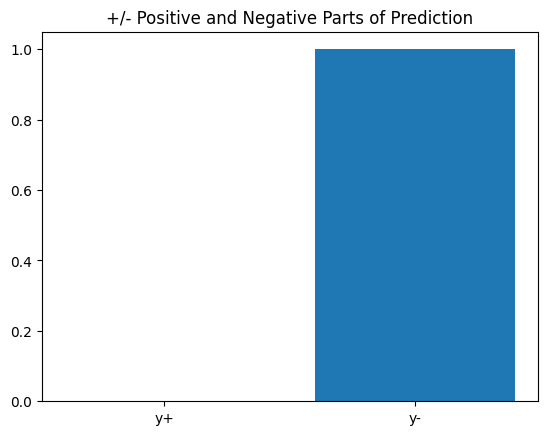

In [22]:
model.pos_neg_prediction(0, X_test)
plt.show()

<BarContainer object of 13 artists>

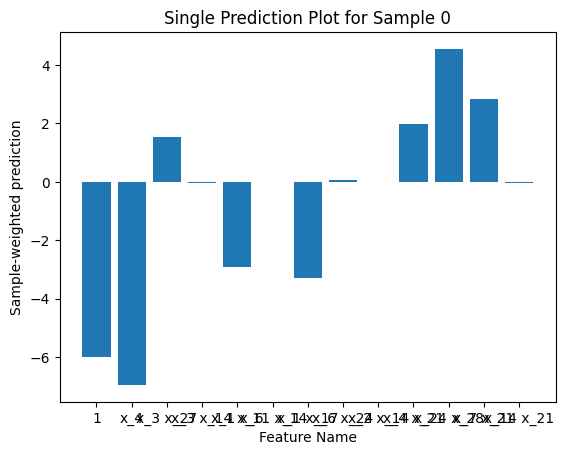

In [23]:
model.single_prediction(0, X_test)
plt.show()

<BarContainer object of 13 artists>

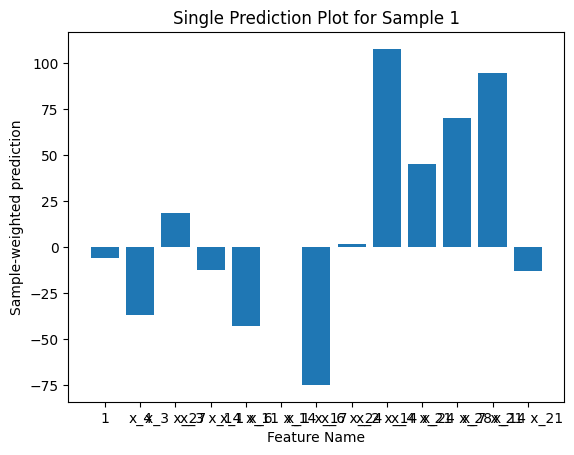

In [24]:
model.single_prediction(1, X_test)
plt.show()